<a href="https://colab.research.google.com/github/AnnSenina/Python_CL_2024/blob/main/notebooks/%D0%92%D0%B8%D0%B7%D1%83%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F__%D0%BF%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pymorphy3
import nltk
from nltk.tokenize import word_tokenize
from nltk import download
download('punkt_tab')
download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('russian')
from collections import Counter
import pymorphy3
from pymorphy3 import MorphAnalyzer
morph = MorphAnalyzer()
from pymystem3 import Mystem
mystem = Mystem()
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# colab / linux way...
!wget https://github.com/AnnSenina/Python_CL_2024/raw/refs/heads/main/data/%D0%9A%D1%80%D0%B0%D1%81%D0%BD%D0%BE%D0%B2.txt
!wget https://github.com/AnnSenina/Python_CL_2024/raw/refs/heads/main/data/%D0%9F%D0%BE%20%D0%BF%D1%80%D0%B8%D1%87%D0%B8%D0%BD%D0%B5%20%D0%B4%D1%83%D1%88%D0%B8.txt
!wget https://github.com/AnnSenina/Python_CL_2024/raw/refs/heads/main/data/%D0%A7%D0%B5%D1%85%D0%BE%D0%B2.txt

In [43]:
def lemm_pymorphy(text):
  text_list_nltk = word_tokenize(text.lower())
  text_clean = [word for word in text_list_nltk if word not in stop_words and word[0].isalpha()]
  lemm = [morph.parse(word)[0].normal_form for word in text_clean]
  return lemm

def lemm_mystem(text):
  lemm = mystem.lemmatize(text)
  lemm_clean = [word for word in lemm if word not in stop_words and word[0].isalpha()]
  return lemm_clean

## Задание 1

In [ ]:
with open('Чехов.txt', encoding='utf-8') as f:
  text = f.read()

# топ 50-слов со стоп-словами
top50 = Counter([word for word in mystem.lemmatize(text) if word[0].isalpha()]).most_common(50)
df = pd.DataFrame(top50, columns=['слово', 'частота'])
df.index = df['слово'] # удобно брать подписи из индексов df
df['частота'].sort_values(ascending=False)

In [ ]:
plt.plot(df['частота'].sort_values(ascending=False));

In [ ]:
# сделайте этот график приличным: растяните холст по горизонтали;
# расположите пописи по оси х так, чтобы стало читаемо



Возможный ответ:

In [ ]:
# @title
plt.figure(figsize=(10, 4))
plt.plot(df['частота'].sort_values(ascending=False))
plt.xticks(rotation=90);

In [ ]:
# внесите изменения в код так, чтобы получить топ-50 частотных лемм
top50 = Counter([word for word in mystem.lemmatize(text) if word[0].isalpha()]).most_common(50)

df = pd.DataFrame(top50, columns=['лемма', 'частота'])
df.index = df['лемма'] # удобно брать подписи из индексов df
df['частота'].sort_values(ascending=False)

# затем снова постройте приличный график

Возможный ответ:

In [ ]:
# @title
top50 = Counter(lemm_pymorphy(text)).most_common(50)
# или:
top50 = Counter(lemm_mystem(text)).most_common(50)

df = pd.DataFrame(top50, columns=['лемма', 'частота'])
df.index = df['лемма'] # удобно брать подписи из индексов df
df['частота'].sort_values(ascending=False)

In [ ]:
# @title
plt.figure(figsize=(10, 4))
plt.plot(df['частота'].sort_values(ascending=False))
plt.xticks(rotation=90);

In [ ]:
# будьте внимательны с бар-чартами, им нужны явно заданные подписи оси х
plt.figure(figsize=(10, 5))
plt.bar(df['частота'].sort_values(ascending=False)[:10].index,
        df['частота'].sort_values(ascending=False)[:10]);

## Задание 2. Частеречная разметка

In [65]:
def pos_pymorphy(word):
  return morph.parse(word)[0].tag.POS

def pos_mystem(word):
  try:
    return mystem.analyze(word)[0]['analysis'][0]['gr'][0]
  except:
    None

In [ ]:
df = pd.DataFrame(lemm_mystem(text), columns=['слово'])
df['pymorphy'] = df['слово'].apply(pos_pymorphy)
df['mystem'] = df['слово'].apply(pos_mystem)
df

- создайте частотные таблицы с помощью `df[столбец].value_counts()`

- постройте бар-чарты для граммем pymorphy и mystem



In [ ]:
# pymorphy


In [ ]:
# mystem


Возможный ответ:

In [ ]:
# @title
plt.figure(figsize=(10, 5))
plt.bar(df['pymorphy'].value_counts().index,
        df['pymorphy'].value_counts());

In [ ]:
# @title
plt.figure(figsize=(10, 5))
plt.bar(df['mystem'].value_counts().index,
        df['mystem'].value_counts());

- переделайте эти графики в пай-плоты

In [ ]:
# pymorphy


In [ ]:
# mystem


In [ ]:
# @title
plt.pie(df['pymorphy'].value_counts(),
        labels=df['pymorphy'].value_counts().index,
        autopct='%1.1f%%'); # на паре не смотрели, но можно еще вывести проценты

In [ ]:
# @title
plt.pie(df['mystem'].value_counts(),
        labels=df['mystem'].value_counts().index,
        autopct='%1.1f%%');

Как делать пай-чарты не такими ужасными?))

In [ ]:
# всегда хочется срезать только частотные категории, но это будет некорректно - их доли изменяется

df['pymorphy'].value_counts()
# отфильтруем сроки со значением больше 1000
# потом сохраним в новую таблицу

In [ ]:
mini = df['pymorphy'].value_counts()
res = mini[mini > 1000]
other = mini[mini <= 1000].sum() # создадим категорию Другие = посчитаем, сколько значений мы потеряли при фильтрации
res = pd.concat([res, pd.Series(other, index=['Другие'], name='count')]) # объдиняем нужные значения + другие
plt.pie(res, autopct='%.2f', labels = res.index) ;

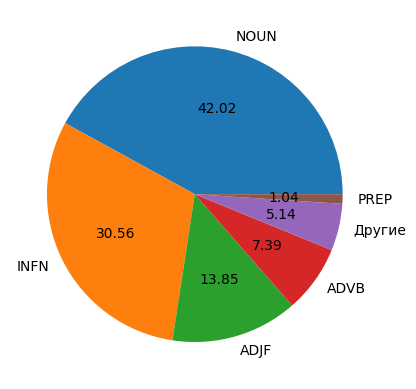

In [96]:
# вот так тоже должно работать, но у меня выполнялось 5-6 минут...
# хотя это более понятный нам способ

def f(n):
  if n not in list(df['pymorphy'].value_counts()[:5].index):
    return 'Другие'
  else:
    return n

df['pymorphy_coded'] = df['pymorphy'].apply(f)

plt.pie(df['pymorphy_coded'].value_counts(), autopct='%.2f', labels = df['pymorphy_coded'].value_counts().index) ;

### Бонус

In [97]:
with open('По причине души.txt', encoding='utf-8') as f:
  text2 = f.read()

In [98]:
with open('Краснов.txt', encoding='utf-8') as f:
  text3 = f.read()

In [100]:
corpus = [text, text2, text3]

In [101]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words)
tfidf = tfidf_vectorizer.fit_transform(corpus)
words = tfidf_vectorizer.get_feature_names_out()
data = tfidf.todense().tolist()
keywords = pd.DataFrame(data, columns = words)

In [ ]:
res = keywords.T
res.columns = ['Чехов', 'Краснов_По причине души', 'Краснов_Новомир']
res

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(res['Краснов_По причине души'], res['Краснов_Новомир'])
plt.xlabel('Краснов_По причине души', fontsize=12)
plt.ylabel('Краснов_Новомир', fontsize=12);

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(res['Краснов_По причине души'], res['Чехов'])
plt.xlabel('Краснов_По причине души', fontsize=12)
plt.ylabel('Чехов', fontsize=12);

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(res['Краснов_Новомир'], res['Чехов'])
plt.xlabel('Краснов_Новомир', fontsize=12)
plt.ylabel('Чехов', fontsize=12);

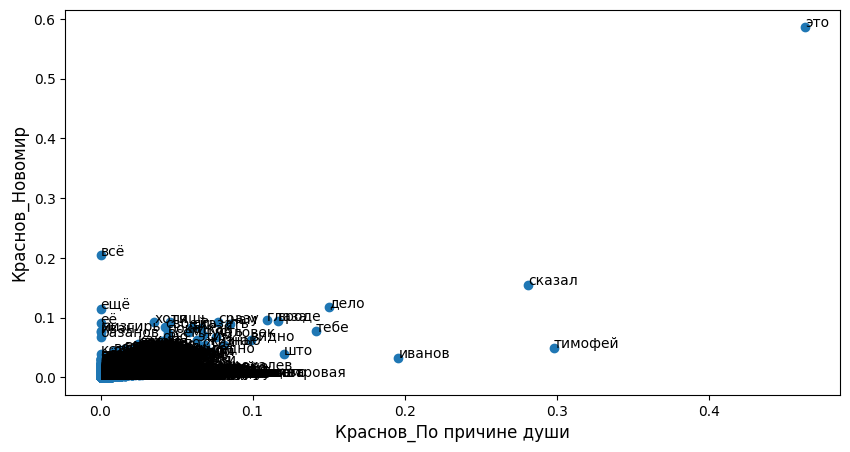

In [117]:
# попробуем добавить подписи к точкам
# запускайте на свой страх и риск, будет долго

plt.figure(figsize=(10, 5))
plt.scatter(res['Краснов_По причине души'], res['Краснов_Новомир'])

for x_coord, y_coord, label in zip(res['Краснов_По причине души'], res['Краснов_Новомир'], res.index):
    plt.text(x_coord, y_coord, label)

plt.xlabel('Краснов_По причине души', fontsize=12)
plt.ylabel('Краснов_Новомир', fontsize=12);

# как видите, общее слово оказалось невычищенным стоп-словом

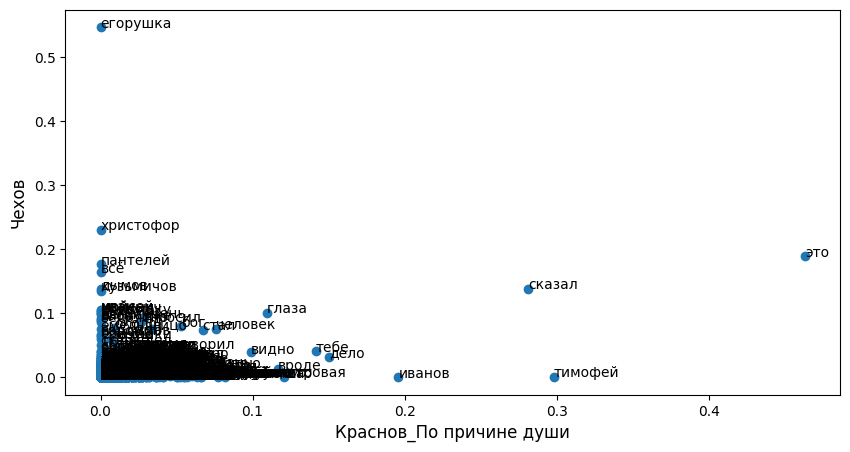

In [118]:
plt.figure(figsize=(10, 5))
plt.scatter(res['Краснов_По причине души'], res['Чехов'])

for x_coord, y_coord, label in zip(res['Краснов_По причине души'], res['Чехов'], res.index):
    plt.text(x_coord, y_coord, label)

plt.xlabel('Краснов_По причине души', fontsize=12)
plt.ylabel('Чехов', fontsize=12);

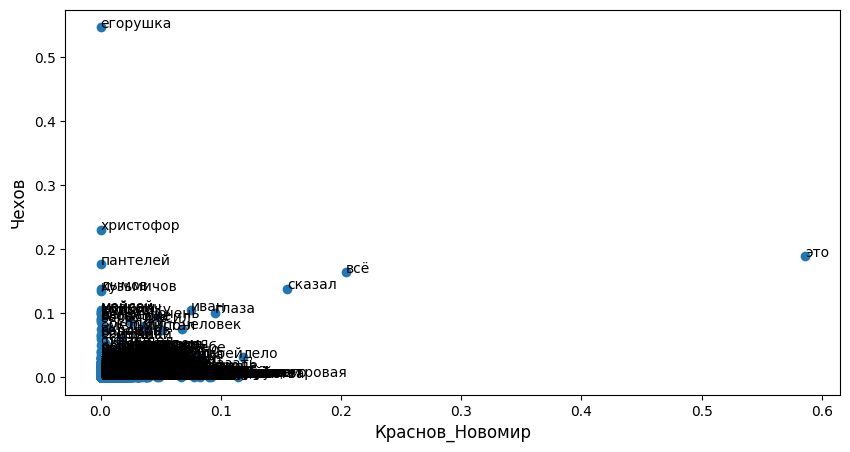

In [119]:
plt.figure(figsize=(10, 5))
plt.scatter(res['Краснов_Новомир'], res['Чехов'])

for x_coord, y_coord, label in zip(res['Краснов_Новомир'], res['Чехов'], res.index):
    plt.text(x_coord, y_coord, label)

plt.xlabel('Краснов_Новомир', fontsize=12)
plt.ylabel('Чехов', fontsize=12);